In [25]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [26]:
data_dir = r"C:\Users\singh\Downloads\archive\agri_data\data"
img_size = 128
classes = ["crop", "weed"]  # Replace with actual class names if needed

images = []
labels = []

for file in os.listdir(data_dir):
    if file.endswith(".jpeg") or file.endswith(".jpg"):  # Check for image files
        img_path = os.path.join(data_dir, file)
        txt_path = img_path.replace(".jpeg", ".txt").replace(".jpg", ".txt")
        
        # Load image
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (img_size, img_size)) / 255.0  # Normalize image
        images.append(img)
        
        # Load label
        if os.path.exists(txt_path):
            with open(txt_path, "r") as f:
                lines = f.readlines()
                for line in lines:
                    label = int(line.split()[0])  # Extract class_id
                    labels.append(label)

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# One-hot encode the labels
labels = to_categorical(labels, num_classes=len(classes))

print(f"Dataset loaded: {images.shape}, Labels: {labels.shape}")


Dataset loaded: (1300, 128, 128, 3), Labels: (2072, 2)


In [27]:
# Initialize empty lists
images = []
labels = []

for file in os.listdir(data_dir):
    if file.endswith(".jpeg") or file.endswith(".jpg"):  # Check for image files
        img_path = os.path.join(data_dir, file)
        txt_path = img_path.replace(".jpeg", ".txt").replace(".jpg", ".txt")
        
        if os.path.exists(txt_path):  # Ensure annotation file exists
            # Load image
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (img_size, img_size)) / 255.0  # Normalize image
            images.append(img)

            # Load label from the corresponding annotation file
            with open(txt_path, "r") as f:
                lines = f.readlines()
                for line in lines:
                    label = int(line.split()[0])  # Extract class_id
                    labels.append(label)

print(f"Loaded {len(images)} images and {len(labels)} labels.")


Loaded 1300 images and 2072 labels.


In [28]:
for file in os.listdir(data_dir):
    if file.endswith(".txt") and not os.path.exists(file.replace(".txt", ".jpeg")):
        print(f"Missing image for: {file}")
    elif file.endswith(".jpeg") and not os.path.exists(file.replace(".jpeg", ".txt")):
        print(f"Missing annotation for: {file}")


Missing annotation for: agri_0_1009.jpeg
Missing image for: agri_0_1009.txt
Missing annotation for: agri_0_1017.jpeg
Missing image for: agri_0_1017.txt
Missing annotation for: agri_0_1018.jpeg
Missing image for: agri_0_1018.txt
Missing annotation for: agri_0_1020.jpeg
Missing image for: agri_0_1020.txt
Missing annotation for: agri_0_1024.jpeg
Missing image for: agri_0_1024.txt
Missing annotation for: agri_0_1026.jpeg
Missing image for: agri_0_1026.txt
Missing annotation for: agri_0_1028.jpeg
Missing image for: agri_0_1028.txt
Missing annotation for: agri_0_1041.jpeg
Missing image for: agri_0_1041.txt
Missing annotation for: agri_0_1053.jpeg
Missing image for: agri_0_1053.txt
Missing annotation for: agri_0_106.jpeg
Missing image for: agri_0_106.txt
Missing annotation for: agri_0_1068.jpeg
Missing image for: agri_0_1068.txt
Missing annotation for: agri_0_1079.jpeg
Missing image for: agri_0_1079.txt
Missing annotation for: agri_0_1082.jpeg
Missing image for: agri_0_1082.txt
Missing annota

In [29]:
# Truncate or extend labels to match images
labels = labels[:len(images)]


In [30]:
print(f"Number of images: {len(images)}")
print(f"Number of labels: {len(labels)}")


Number of images: 1300
Number of labels: 1300


In [31]:
# Convert images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)

# One-hot encode labels
labels = to_categorical(labels, num_classes=len(classes))

# Check before splitting
print(f"Dataset size: {images.shape}, Labels: {labels.shape}")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


Dataset size: (1300, 128, 128, 3), Labels: (1300, 2)


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


model = Sequential([
   
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
   
    Flatten(),
    
   
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')  # Output layer with the number of classes
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,578 (28.20 MB)

 Trainable params: 7,392,578 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Set the number of epochs and batch size
epochs = 15
batch_size = 32

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    batch_size=batch_size
)


Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.5819 - loss: 1.0344 - val_accuracy: 0.5769 - val_loss: 0.6829
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.5972 - loss: 0.6762 - val_accuracy: 0.5769 - val_loss: 0.6839
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.6185 - loss: 0.6684 - val_accuracy: 0.5769 - val_loss: 0.7237
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.6058 - loss: 0.6669 - val_accuracy: 0.5769 - val_loss: 0.6833
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.6860 - loss: 0.6182 - val_accuracy: 0.5692 - val_loss: 0.6934
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.7243 - loss: 0.5611 - val_accuracy: 0.5500 - val_loss: 0.7859
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.7837 - loss: 0.4723 - val_accuracy: 0.5154 - val_loss: 0.7860
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.8079 - loss: 0.4249 - val_accuracy: 0.

In [34]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5703 - loss: 1.7974
Test Loss: 1.7766509056091309, Test Accuracy: 0.5461538434028625


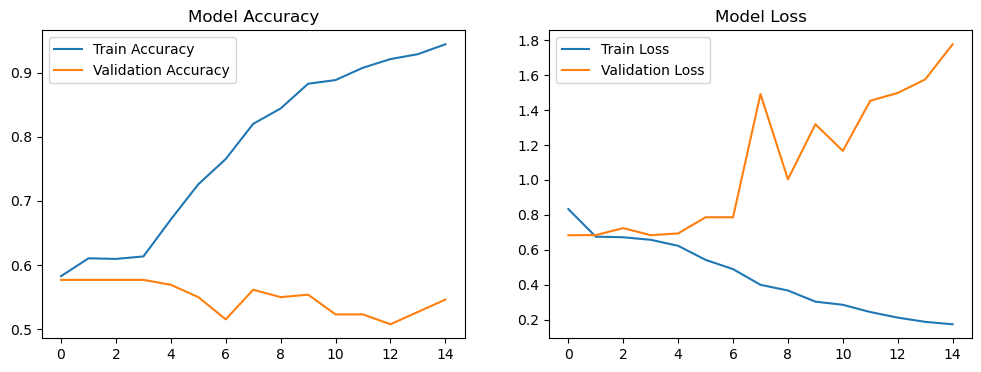

In [35]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [36]:
model.save('crop_weed_detection_model.h5')


In [37]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess a new image
img_path = r'C:\Users\singh\Downloads\archive\agri_data\data\agri_0_9892.jpeg'  # Provide the path to a new image
new_img = image.load_img(img_path, target_size=(img_size, img_size))
new_img_array = image.img_to_array(new_img) / 255.0
new_img_array = np.expand_dims(new_img_array, axis=0)

# Predict the class
prediction = model.predict(new_img_array)
predicted_class = np.argmax(prediction)
print(f"Predicted Class: {classes[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
Predicted Class: crop
